In [1]:
import sqlite3 
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import requests
import sys
import datetime
import sys
!{sys.executable} -m pip install lxml 
import re
import matplotlib.pyplot as plt

In [2]:
# Step 1

url = 'https://www.spaceweatherlive.com/en/solar-activity/top-50-solar-flares'
headers = {
    "user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.102 Safari/537.36"
}
# used headers to not get blocked bc of server req
req = requests.get(url,headers=headers)


soup = BeautifulSoup(req.text,"html")
table = soup.find("table", attrs={"class" : "table table-striped table-responsive-md"})
df = pd.read_html(str(table))


dataTable = df[0]
tbl = pd.DataFrame({"rank" : [],
       "x_class" : [],
       "date" : [],
       "region" : [],
       "start_time" : [],
       "maximum" : [],
       "end_time" : [],
       "movie" : []
      })


# iterate to get data into tbl
for index, row in dataTable.iterrows():
    tbl = tbl.append({
        "rank" : int(row["Unnamed: 0"]),
        "x_class" : str(row["Unnamed: 1"]),
        "date" : str(row["Unnamed: 2"]),
        "region" : str(row["Region"]).zfill(4),
        "start_time" : str(row["Start"]),
        "maximum" : str(row["Maximum"]),
       "end_time" : str(row["End"]),
       "movie" : str(row["Unnamed: 7"])
      }, ignore_index=True)

    
# type casting to finish step 1
tbl["rank"] = tbl["rank"].astype(int)
tbl.x_class = tbl.x_class.astype(str)
tbl.date = tbl.date.astype(str)
tbl.region = tbl.region.astype(str)
tbl.start_time = tbl.start_time.astype(str)
tbl.maximum = tbl.maximum.astype(str)
tbl.end_time = tbl.end_time.astype(str)
tbl.movie = tbl.movie.astype(str)
tbl.replace("-", np.NaN)

# print out the table
print(tbl)

    rank x_class        date region start_time maximum end_time  \
0      1    X28+  2003/11/04   0486      19:29   19:53    20:06   
1      2    X20+  2001/04/02   9393      21:32   21:51    22:03   
2      3  X17.2+  2003/10/28   0486      09:51   11:10    11:24   
3      4    X17+  2005/09/07   0808      17:17   17:40    18:03   
4      5   X14.4  2001/04/15   9415      13:19   13:50    13:55   
5      6     X10  2003/10/29   0486      20:37   20:49    21:01   
6      7    X9.4  1997/11/06   8100      11:49   11:55    12:01   
7      8    X9.3  2017/09/06   2673      11:53   12:02    12:10   
8      9      X9  2006/12/05   0930      10:18   10:35    10:45   
9     10    X8.3  2003/11/02   0486      17:03   17:25    17:39   
10    11    X8.2  2017/09/10   2673      15:35   16:06    16:31   
11    12    X7.1  2005/01/20   0720      06:36   07:01    07:26   
12    13    X6.9  2011/08/09   1263      07:48   08:05    08:08   
13    14    X6.5  2006/12/06   0930      18:29   18:47    19:0

In [3]:
# Begin step 2

# makes a new dataframe in order to update for step 2
tbl2 = pd.DataFrame({"rank" : [],
       "x_class" : [],
       "start_datetime" : [],
       "max_datetime" : [],
       "end_datetime" : [],
       "region" : []
      })


# date will have information about the date,
# now I can map a function to update cells
for index, row in tbl.iterrows():
    
    date1 = datetime.datetime.strptime(row["date"] + " " + row["start_time"] , "%Y/%m/%d %H:%M")
    date2 = datetime.datetime.strptime(row["date"] + " " + row["end_time"] , "%Y/%m/%d %H:%M")
    date3 = datetime.datetime.strptime(row["date"] + " " + row["maximum"] , "%Y/%m/%d %H:%M")
    
    tbl2 = tbl2.append({"rank" : row["rank"],
       "x_class" : row["x_class"],
       "start_datetime" : date1,
       "max_datetime" : date3,
       "end_datetime" : date2,
       "region" : row["region"]
      }, ignore_index=True)

    
    
tbl2.replace(["----", "--:--", "----/--/--", "-----", "--/--"], "NaN", inplace = True)

print(tbl2)

    rank x_class      start_datetime        max_datetime        end_datetime  \
0    1.0    X28+ 2003-11-04 19:29:00 2003-11-04 19:53:00 2003-11-04 20:06:00   
1    2.0    X20+ 2001-04-02 21:32:00 2001-04-02 21:51:00 2001-04-02 22:03:00   
2    3.0  X17.2+ 2003-10-28 09:51:00 2003-10-28 11:10:00 2003-10-28 11:24:00   
3    4.0    X17+ 2005-09-07 17:17:00 2005-09-07 17:40:00 2005-09-07 18:03:00   
4    5.0   X14.4 2001-04-15 13:19:00 2001-04-15 13:50:00 2001-04-15 13:55:00   
5    6.0     X10 2003-10-29 20:37:00 2003-10-29 20:49:00 2003-10-29 21:01:00   
6    7.0    X9.4 1997-11-06 11:49:00 1997-11-06 11:55:00 1997-11-06 12:01:00   
7    8.0    X9.3 2017-09-06 11:53:00 2017-09-06 12:02:00 2017-09-06 12:10:00   
8    9.0      X9 2006-12-05 10:18:00 2006-12-05 10:35:00 2006-12-05 10:45:00   
9   10.0    X8.3 2003-11-02 17:03:00 2003-11-02 17:25:00 2003-11-02 17:39:00   
10  11.0    X8.2 2017-09-10 15:35:00 2017-09-10 16:06:00 2017-09-10 16:31:00   
11  12.0    X7.1 2005-01-20 06:36:00 200

In [4]:
# Step 3 FINISHED

# Pulls from url
url2 = 'https://cdaw.gsfc.nasa.gov/CME_list/radio/waves_type2.html'
req2 = requests.get(url2,headers=headers)
soup2 = BeautifulSoup(req2.text,"lxml")

# identifies the table we're pulling from
tabl = soup2.find("table", attrs={"class" : "table table-striped table-responsive-md"})
text = soup2.get_text()
splt = text.split()

# creates the tabl we will be appending with accurate values
tabl = pd.DataFrame({"start_date" : [],
       "start_time" : [],
       "end_date" : [],
       "end_time" : [],
       "start_frequency" : [],
       "end_frequency" : [],
       "flare_location" : [],
       "flare_region" : [],
        "flare_classification" : [],
        "cme_date" : [],
         "cme_time" : [],
        "cme_angle" : [],
        "cme_width" : [],
        "cme_speed" : [],
        "plots" : []
      })

# moves the string forward to then pattern match
test = text[856:]
pattern = re.compile(r'(\d{4}\/\d{2}\/\d{2}\s{1,}\d{2}:\d{2}\s{1,}\d{2}\/\d{2}\s{1,}\d{2}:\d{2}\s{1,}[\d\W]{4,}\s{1,}[\d\W]{2,}\s{1,}[A-Za-z\d\w\W]{4,7}\s{1,}[A-Za-z\d\w\W]{2,5}\s{1,}[A-Za-z\w\D\W]{1,4}\s{1,}[0-9\w\W]{2}\/[0-9\w\W]{2}\s{1,}[0-9\w\W]{2}:[0-9\w\W]{2}\s{1,}[A-Za-z\d\w\W]{2,4}\s{1,}[A-Za-z\d\w\W]{2,4}\s{1,}[\d\w\W]{3,4}\s{1,}[\w\W]{4})')
matched = pattern.findall(test)


# appending the tabl with properly split values from website
for i in matched:
    string = i.split()
    tabl = tabl.append({"start_date" : string[0],
       "start_time" : string[1],
       "end_date" : string[2],
       "end_time" : string[3],
       "start_frequency" : string[4],
       "end_frequency" : string[5],
       "flare_location" : string[6],
       "flare_region" : string[7],
        "flare_classification" : string[8],
        "cme_date" : string[9],
         "cme_time" : string[10],
        "cme_angle" : string[11],
        "cme_width" : string[12],
        "cme_speed" : string[13],
        "plots" : string[14]
      }, ignore_index=True)
    string = ""
    
# deleting the column we won't use
del tabl["plots"]

# replacing the empty values with NaN
tabl.replace(["----", "--:--", "----/--/--", "-----", "--/--"], "NaN", inplace = True)

# print tabl
print(tabl) 



     start_date start_time end_date end_time start_frequency end_frequency  \
0    1997/04/01      14:00    04/01    14:15            8000          4000   
1    1997/04/07      14:30    04/07    17:30           11000          1000   
2    1997/05/12      05:15    05/14    16:00           12000            80   
3    1997/05/21      20:20    05/21    22:00            5000           500   
4    1997/09/23      21:53    09/23    22:16            6000          2000   
..          ...        ...      ...      ...             ...           ...   
513  2017/09/04      20:27    09/05    04:54           14000           210   
514  2017/09/06      12:05    09/07    08:00           16000            70   
515  2017/09/10      16:02    09/11    06:50           16000           150   
516  2017/09/12      07:38    09/12    07:43           16000         13000   
517  2017/09/17      11:45    09/17    12:35           16000           900   

    flare_location flare_region flare_classification cme_date c

In [5]:
# step 4 begin

# Basis of where we will be adding the data to
tidytbl = pd.DataFrame({"start_datetime" : [],
       "end_datetime" : [],
       "start_frequency" : [],
       "end_frequency" : [],
       "flare_location" : [],
       "flare_region" : [],
       "importance" : [],
        "cme_datetime" : [],
        "cpa" : [],
        "width" : [],
        "speed" : [],  
        "plot" : [],
        "is_halo" : [],
        "width_lower_bound" : []
      })

# loops through the parsed information
for i in matched:
    
    # splits the data to then control the placement of values
    string1 = i.split()
    date1 = string1[0] + " " + string1[1]    
    date1 = datetime.datetime.strptime(date1, "%Y/%m/%d %H:%M")
    
    
    # Making sure end_datetime is accurate
    if string1[3] == "24:00":
        string1[3] = "00:00"
        date2 = string1[0][:5] + string1[2] + " " + string1[3]
        date2 = datetime.datetime.strptime(date2, "%Y/%m/%d %H:%M")
        date2 = datetime.timedelta(days=1)
    # constructs the datetime as regular    
    else:
        date2 = string1[0][:5] + string1[2] + " " + string1[3]
        date2 = datetime.datetime.strptime(date2, "%Y/%m/%d %H:%M")
        
    # Making sure cme_datetime is accurate    
    if string1[10] == "24:00":
        string1[10] = "00:00"
        date3 = string1[0][:5] + string1[9] + " " + string1[10] 
        date3 = datetime.datetime.strptime(date3, "%Y/%m/%d %H:%M")
        date3 = datetime.timedelta(days=1)
    elif string1[10] == "--:--":
        date3 = np.nan
        # constructs the datetime regular
    else:
        date3 = string1[0][:5] + string1[9] + " " + string1[10] 
        date3 = datetime.datetime.strptime(date3, "%Y/%m/%d %H:%M")
        
    # checks if it is a lower bound and corrects values    
    if ">" in string1[12]:
        string1[12] = string1[12][1:]
        val = True
    else:
        val = False
        
    
    # corrects is_halo values
    if string1[11] in ["Halo"]:
        bol = True
        string1[11] = np.NaN
    else:
        bol = False
        
        
    # constructs the dataframe to then append the original
    tidytbl = tidytbl.append({"start_datetime" : date1,
       "end_datetime" : date2,
       "start_frequency" : string1[4],
       "end_frequency" : string1[5],
       "flare_location" : string1[6],
       "flare_region" : string1[7],
       "importance" : string1[8],
        "cme_datetime" : date3,
        "cpa" : string1[11],
        "width" : string1[12],
        "speed" : string1[13],  
        "plot" : string1[14],
        "is_halo" : bool(bol),
        "width_lower_bound" : val
      }, ignore_index=True)
    string1 = ""
    
    
    
# This block fixes any missing values and places NaN
tidytbl.replace(["----", "--:--", "----/--/--", "-----", "--/--"], "NaN", inplace = True)


# changes the type of is_halo/width_lower to display boolean
tidytbl.is_halo = tidytbl.is_halo.astype(bool)
tidytbl.width_lower_bound = tidytbl.width_lower_bound.astype(bool)

# printing the tidytbl
print(tidytbl)





         start_datetime         end_datetime start_frequency end_frequency  \
0   1997-04-01 14:00:00  1997-04-01 14:15:00            8000          4000   
1   1997-04-07 14:30:00  1997-04-07 17:30:00           11000          1000   
2   1997-05-12 05:15:00  1997-05-14 16:00:00           12000            80   
3   1997-05-21 20:20:00  1997-05-21 22:00:00            5000           500   
4   1997-09-23 21:53:00  1997-09-23 22:16:00            6000          2000   
..                  ...                  ...             ...           ...   
513 2017-09-04 20:27:00  2017-09-05 04:54:00           14000           210   
514 2017-09-06 12:05:00  2017-09-07 08:00:00           16000            70   
515 2017-09-10 16:02:00  2017-09-11 06:50:00           16000           150   
516 2017-09-12 07:38:00  2017-09-12 07:43:00           16000         13000   
517 2017-09-17 11:45:00  2017-09-17 12:35:00           16000           900   

    flare_location flare_region importance        cme_datetime 

In [6]:
# Question 1

# tbl and tbl2 = Solar, SolarTidy
# tabl and tidytbl = Nasa, NasaTidy

spaceweather = tbl2.copy()
nasa = tidytbl.copy()

# create top 50 dataframe that will contain the X classified rows
top = nasa.loc[nasa['importance'].astype(str).str.contains('X')].copy()
top['top50_flare'] = top['importance']
top['top50_flare'] = top['top50_flare'].str.replace('X', '')
top['top50_flare'] = top['top50_flare'].astype(float)

# the dataframe is then organized by the importance 
top = top.sort_values('top50_flare', ascending = False)
top.drop('top50_flare', axis = 1, inplace = True)

# allocates only the first 50 values in the table
top = top.head(50)

# prints out the table with 50 values
print(top)

         start_datetime         end_datetime start_frequency end_frequency  \
240 2003-11-04 20:00:00      1 days 00:00:00           10000           200   
117 2001-04-02 22:05:00  2001-04-03 02:30:00           14000           250   
233 2003-10-28 11:10:00      1 days 00:00:00           14000            40   
126 2001-04-15 14:05:00  2001-04-16 13:00:00           14000            40   
234 2003-10-29 20:55:00      1 days 00:00:00           11000           500   
8   1997-11-06 12:20:00  1997-11-07 08:30:00           14000           100   
514 2017-09-06 12:05:00  2017-09-07 08:00:00           16000            70   
328 2006-12-05 10:50:00  2006-12-05 20:00:00           14000           250   
237 2003-11-02 17:30:00  2003-11-03 01:00:00           12000           250   
515 2017-09-10 16:02:00  2017-09-11 06:50:00           16000           150   
288 2005-01-20 07:15:00  2005-01-20 16:30:00           14000            25   
359 2011-08-09 08:20:00  2011-08-09 08:35:00           16000    

In [7]:
# Question 2

# initialize column
top['rank'] = 0

for index, row_space in spaceweather.iterrows():
    for index2, row_nasa in top.iterrows():
        # find if the regions match to change the rank on the top table
        if row_nasa["flare_region"] != "NaN" and row_space['region'] == int(row_nasa['flare_region']) \
        and row_space['x_class'] == row_nasa['flare_class']: 
            # changing value to the row_space value
            top.set_value(i2, 'rank', row_space['rank'])
        
# After scanning the list of top50 from Nasa manually, I then found that area 9415
# had the greatest presence on the list. The following is the list of solar flare
# which originate from area 9415
print(top[top["flare_region"] == "9415"])

         start_datetime         end_datetime start_frequency end_frequency  \
126 2001-04-15 14:05:00  2001-04-16 13:00:00           14000            40   
121 2001-04-06 19:35:00  2001-04-07 01:50:00           14000           230   
123 2001-04-10 05:24:00      1 days 00:00:00           14000           100   
125 2001-04-12 10:20:00  2001-04-12 10:40:00           14000          7000   

    flare_location flare_region importance        cme_datetime  cpa width  \
126         S20W85         9415       X14. 2001-04-15 14:06:00  245   167   
121         S21E31         9415       X5.6 2001-04-06 19:30:00  NaN   360   
123         S23W09         9415       X2.3 2001-04-10 05:30:00  NaN   360   
125         S19W43         9415       X2.0 2001-04-12 10:31:00  NaN   360   

    speed  plot  is_halo  width_lower_bound  rank  
126  1199  PHTX    False              False     0  
121  1270  PHTX     True              False     0  
123  2411  PHTX     True              False     0  
125  1184  PHTX

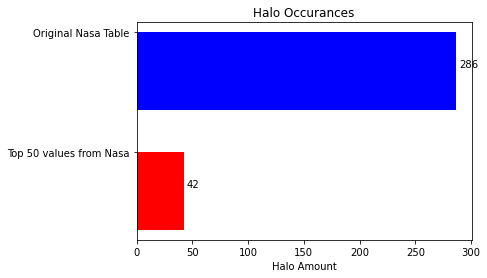

In [8]:
# Question 3

# iterating and counting the occurance of halos in both tables

count = 0 
fifty_count = 0

# If the is_halo column is true then add to counter
for i, row in nasa.iterrows():
    if (row['is_halo']) == True:
        count += 1

# if is_halo is true then add to fifty_counter which keeps track of top50 halos
for i, row in top.iterrows():
    if (row['is_halo']) == True:
        fifty_count += 1
        
        
        
x_labels = ['Top 50 values from Nasa', 'Original Nasa Table']
y_labels = [fifty_count, count]
fig, ax = plt.subplots()

# sets the width of each to .65
width = .65
ind = np.arange(len(x_labels))
ax.barh(ind, y_labels, width, color= ['red', 'blue'])
ax.set_yticks(ind + width / 2)

# setting graph properties
ax.set_title('Halo Occurances')
ax.set_xlabel('Halo Amount')
ax.set_yticklabels(x_labels)

# adds ther lable to 
for i, v in enumerate(y_labels):
    ax.text(v + 3, i + .03, str(v))
    
plt.show()

# (a, c, d)As a conclusion, with the plot below we hope to recognize a correlation 
# if being in the top50 flares has a greater probability to have a Halo
# after careful analysis it seems to be true. 42/50 - 84% of top 50 flares
# had a Halo. Which gives a reason to believe that having a halo gives a better
# chance at being in the top50. This is an example of positive co-variation.
